# Video: Visualizing the Thompson Sampling Algorithm

The Thompson sampling algorithm works very differently from upper confidence bound algorithms, yet behaves very similarly.
We will look at how the Thompson sampling process balances exploration and exploitation too.

## Thompson Sampling

A very Bayesian approach to bandit algorithms...

For each arm,
* Track posterior distributions of the reward distribution parameters.

For each choice,
* Sample those posterior distributions to "guess" the parameters.
* Pick the arm whose guess has the highest expected reward.
* Pull that arm for reward.
* Update that arm's posterior distribution based on the new reward.

TLDR: (add this as an overlay covering up the previous four bullets when I say the matching line)
* Thompson sampling picks arms according to the probability that they are the best.

Script:
* The Thompson sampling method is entirely based on Bayesian statistics.
* Knowledge about each arm is maintained with posterior distributions based on rewards from that arm so far.
* And for each choice made, those posterior distributions are sampled and the arm whose sample has the highest expected reward is chosen.
* Therefore, this choice picks arms according to the chance that each has the highest expected reward given our data so far.

## Weakness of Thompson Sampling

Gotcha:
* Updating posterior distributions with Bayesian analysis is usually hard!

So in practice,
* Thompson sampling is mostly used for rewards with Bernoulli distributions.
* Using Beta distributions to represent the posterior distributions is easy.

Script:
* The big downside of Thompson sampling is all those Bayesian updates are hard.
* A lot of the time, Thompson sampling will be avoided unless there is a convenient easy to manipulate family of probability distributions that works as a prior for our problem.
* For us, that means we are working with Bernoulli rewards and Beta distributions.
* Let's see how that process works now.

## Experiment Setup

* $K=2$ arms
* Bernoulli 0-1 rewards
* First arm: probability 0.4 of reward
* Second arm: probability 0.6 of reward

Script:
* I setup this experiment with $K=2$ for two arms.
* Each arm has Bernoulli rewards, so the rewards will always be zero or one.
* The first arm has probability 0.4 of reward one and the second arm has probability 0.6 of reward one.
* Those are close enough that they might be mixed up early on, but not so close that won't be sorted out quickly.

## Experiment Result


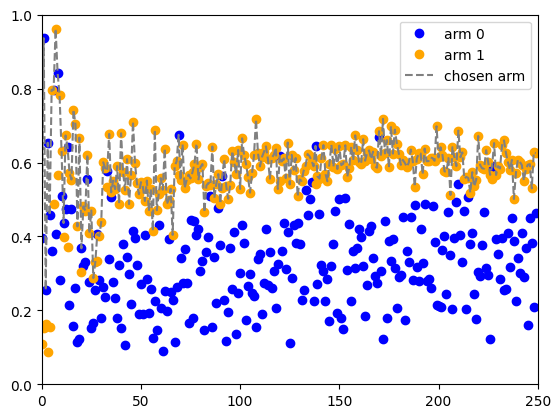

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import scipy.stats
from IPython.display import HTML

# true probabilities

K = 2

probabilities = [0.4, 0.6]

T_max = 250

# sample data

trials = [0 for _ in range(K)]
successes = [0 for _ in range(K)]

samples_history = []

np.random.seed(704)
for i in range(T_max):
    samples = [scipy.stats.beta.rvs(1 + successes[j], 1 + trials[j] - successes[j]) for j in range(K)]
    samples_history.append(samples)

    j = np.argmax(samples)
    trials[j] += 1
    successes[j] += np.random.uniform(0, 1) < probabilities[j]

samples_history = np.array(samples_history)

# setup Matplotlib figure and artist objects

fig = plt.figure()
ax = plt.axes(ylim=(0, 1))
line0, = ax.plot([0], [0], label="arm 0", color="blue", linestyle="none", marker="o")
line1, = ax.plot([0], [0], label="arm 1", color="orange", linestyle="none", marker="o")
choices, = ax.plot([0], [0], label="chosen arm", color="grey", linestyle="--")
artists = (line0, line1, choices, plt.legend())

def init():
    return artists

def animate(i):
    for j in range(K):
        artists[j].set_data(range(i+1), samples_history[:i+1,j])
    ax.set_xlim(0, i+1)

    choices.set_data(range(i+1), np.max(samples_history[:i+1,:], axis=1))

    return artists

anim = FuncAnimation(fig, func=animate, init_func=init, frames=T_max, interval=200)

# extra args to enable HTML embedding
anim.save("thompson.mp4", fps=30, extra_args=['-vcodec', 'libx264']);

Script:
* Here is the end of the experiment.
* The blue circles represent the samples of the first arm, and the orange circles represent the samples of the second arm.
* The dashed line connects the highest samples each round.
* Early on, both arms had samples from a wide range, and the highest sample varied a lot.
* But over time, the sample range for the second arm tightened up a lot and so did the highest sample.
* The sample range for the first arm did tighten up too, but nearly as much, since it stopped getting chosen regularly, so its learning slowed down.
* Let's look at that from the beginning.

## Play this Video Please


In [ ]:
HTML(anim.to_html5_video())

Script:
* At the beginning, both arms are chosen a lot.
* The first arm actually was chosen more often early on, but then its range shrank and the second arm took over most of the time.
* The second arm actually does perform better, so it's range tightens up in a smaller range.
* So now, the first arm samples are mostly in a low range below the second arm samples, and the second arm is almost always chosen.
* We can see the range of the second arm slowly tightening still because it keeps getting chosen.
* The first arm is mostly shut out, and is rarely chosen, so its range is changing very slowly.
* Over the long term, the first arm will shrink its range more, but it will take a while.
* Once the statistics determined that the first arm was very unlikely to be the best, you could see it mostly ignored as the Thompson sampling focused on the better second arm.

Script: (faculty on camera)
* I hope this visualization of Thompson sampling helped your intuition.
* It's a very simple and powerful algorithm if you can handle the Bayesian statistics.

TODO link